**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings


In [3]:
file_path = "D:\\Downloads\\archive (3)\\indian_liver_patient.csv"
df = pd.read_csv(file_path)

<h3 style="color:black;"><b>Preprocessing & Exploratory Data Analysis(EDA)</b></h3>

<h4 style="color:black;"><b>Preprocessing</b><h4>

In [4]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.shape

(583, 11)

In [6]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [7]:
df.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
467,28,Female,1.0,0.3,90,18,108,6.8,3.1,0.8,2
465,45,Female,0.6,0.1,270,23,42,5.1,2.0,0.5,2
400,66,Female,0.7,0.2,162,24,20,6.4,3.2,1.0,2
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.4,1
258,36,Male,0.8,0.2,182,31,34,6.4,3.8,1.4,2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [9]:
df.describe(include = 'all')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,44.746141,NaN,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,NaN,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,NaN,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,NaN,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,NaN,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,NaN,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000


In [10]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
df.duplicated().sum()

13

In [12]:
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [16]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [17]:
df.shape

(570, 11)

<h4 style="color:black;"><b>Preprocessing Reports</b></h4>

- Attribute = 11
- Records = 570
- Features = 10
- Label/Target = 1
- Target: Dataset

<h4 style="color:black;"><b>Categorical Columns</b></h4>

In [18]:
categorical_columns = df.columns[df.dtypes == 'object']

In [19]:
categorical_columns

Index(['Gender'], dtype='object')

<h4 style="color:black;"><b>Unique Values of Categorical Features</b></h4>

In [20]:
for col in df[categorical_columns]:
    value_count = df[col].value_counts()
    print()
    print(f'Unique Values {col} : {value_count}')


Unique Values Gender : Gender
Male      430
Female    140
Name: count, dtype: int64


<h4 style="color:black;"><b>Transformation</b></h4>

In [21]:
df_transform = df.copy()
ordinal_encoder = OrdinalEncoder()
df_transform[categorical_columns] = ordinal_encoder.fit_transform(df_transform[categorical_columns])

In [22]:
df_transform

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1.0,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,1.0,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1.0,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1.0,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [23]:
df_transform.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [24]:
df_transform.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000,570.000000
mean,44.849123,0.754386,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004,1.287719
std,16.242182,0.430829,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635,0.453097
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [25]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    float64
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 53.4 KB


In [26]:
df.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isna().sum().sum()

0

In [29]:
corr = df_transform.corr()

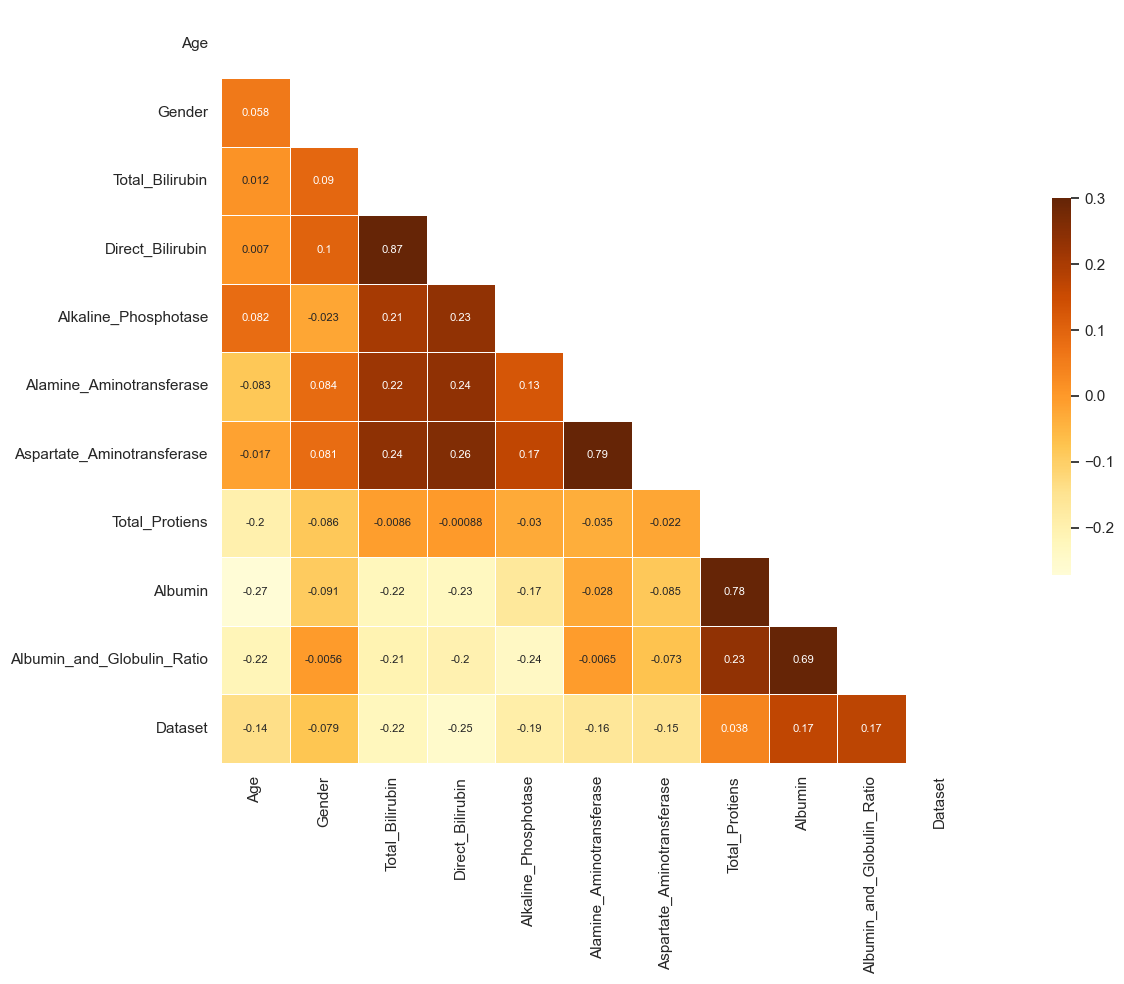

In [30]:
sns.set_theme(style='white')
f, ax = plt.subplots(figsize = (16,10))
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.color_palette("YlOrBr", as_cmap= True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidths = .5, cbar_kws = {'shrink':.5},
            annot = True, annot_kws= {'size':8})
plt.tight_layout()
plt.show()

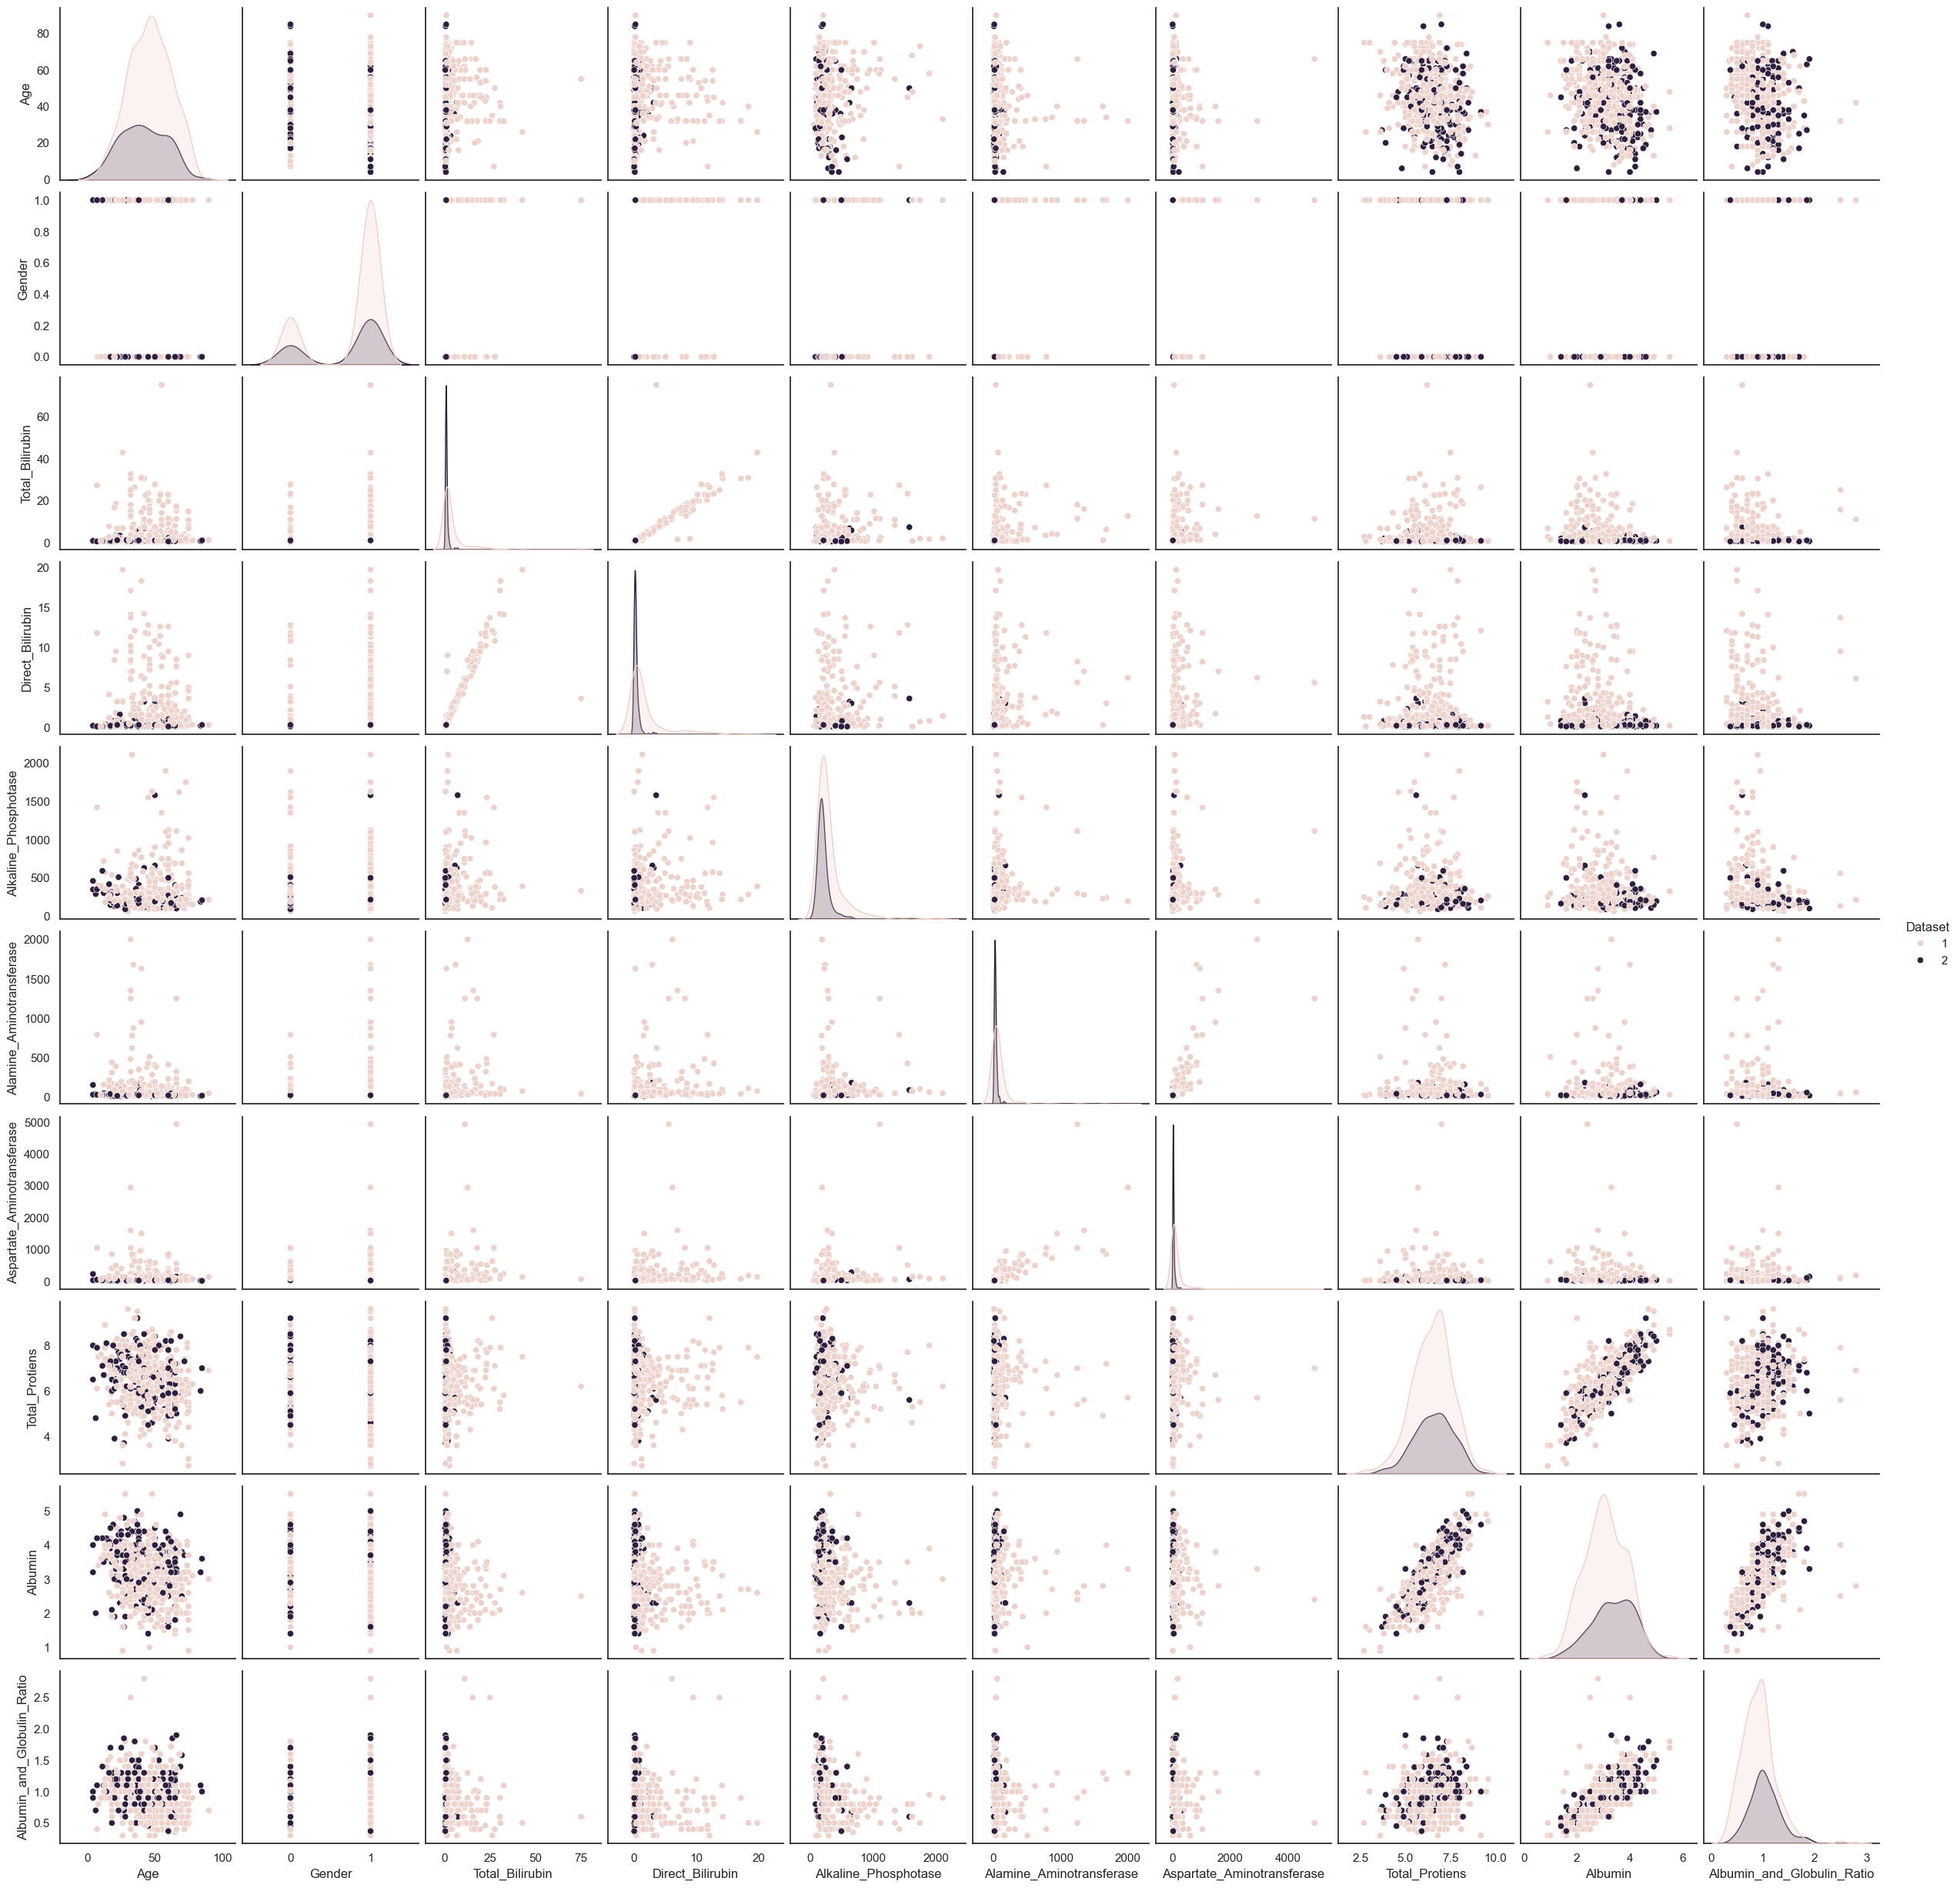

In [31]:
sns.pairplot(df_transform, hue = 'Dataset')
plt.show()

<h4 style="color:black;"><b>Seperate the Target and Features From Dataset</b></h4>

In [32]:
target_name = 'Dataset'
labels = df_transform[target_name]
features = df_transform.drop(target_name, axis = 1)

In [33]:
features

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1.0,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1.0,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1.0,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1.0,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1.0,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1.0,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1.0,1.3,0.5,184,29,32,6.8,3.4,1.00


In [34]:
for col in features:
    if col == 'Gender':
        features[col] = features[col].astype('int')
    else:
        features[col] = features[col]

In [35]:
features.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


<h4 style="color:black;"><b>Fitting</b></h4>

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
features = MinMaxScaler().fit_transform(features)

In [38]:
features

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

In [39]:
features

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

In [41]:
%%time
best_accuracy_train = 0.0
best_accuracy_test = 0.0
best_random_state = None
rs_range = np.arange(1,2000)
acc_test_list = np.zeros(len(rs_range))
test_list = {}

for i in rs_range:
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=.20, random_state=i)
    rfc = RandomForestClassifier(random_state=i)
    rfc.fit(train_features, train_labels)
    train_score = rfc.score(train_features, train_labels)
    test_score = rfc.score(test_features, test_labels)
    
    acc_test_list[i-1] = test_score


    if train_score > best_accuracy_train:
        best_accuracy_train = train_score
        best_random_state = i

    if test_score > best_accuracy_test:
        best_accuracy_test = test_score
        best_random_state = i

        rfc_best = rfc

        test_list[f"{i}"] = test_score

print(f"Train Score : {best_accuracy_train}")
print(f"Test Score : {best_accuracy_test}")
print(f"Best Random State : {best_random_state}")

Train Score : 1.0
Test Score : 0.8421052631578947
Best Random State : 1687
CPU times: total: 9min 18s
Wall time: 21min 4s


In [42]:
max_test = max(acc_test_list)
loc_maxtest = np.where(acc_test_list == max_test)
rs_maxtest = rs_range[loc_maxtest]

print(f"Max_Test : {max_test}")
print(f"rs : {rs_maxtest[0]}")

Max_Test : 0.8421052631578947
rs : 1687


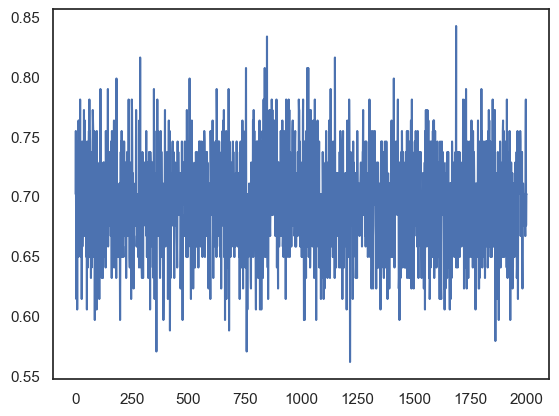

In [43]:
plt.plot(rs_range, acc_test_list)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report

In [53]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=.20, random_state=best_random_state)

rfc_best = RandomForestClassifier(random_state = best_random_state)
rfc_best.fit(train_features, train_labels)

train_score = rfc_best.score(train_features, train_labels)

test_score = rfc_best.score(test_features, test_labels)

rfc_pred = rfc_best.predict(test_features)

cm = confusion_matrix(test_labels, rfc_pred)

report_best = classification_report(test_labels, rfc_pred, digits = 4)

print(f"Train Score : {train_score}")
print(f"Test Score : {test_score}")
print(f"Classification Report of Random FOrest Classifier : \n{report_best}")

Train Score : 1.0
Test Score : 0.8421052631578947
Classification Report of Random FOrest Classifier : 
              precision    recall  f1-score   support

           1     0.8627    0.9565    0.9072        92
           2     0.6667    0.3636    0.4706        22

    accuracy                         0.8421       114
   macro avg     0.7647    0.6601    0.6889       114
weighted avg     0.8249    0.8421    0.8230       114



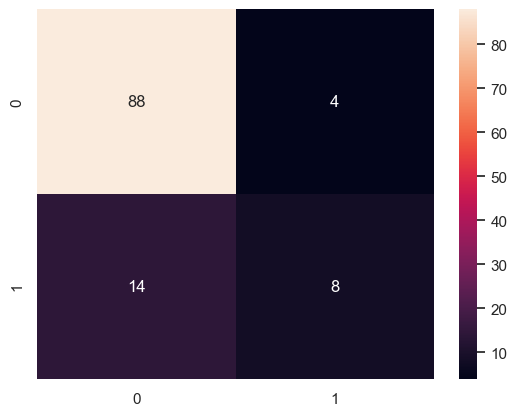

In [54]:
sns.heatmap(confusion_matrix(test_labels, rfc_pred), annot = True)
plt.show()

<h4 style="color:black;"><b>Feature Importance</b></h4>

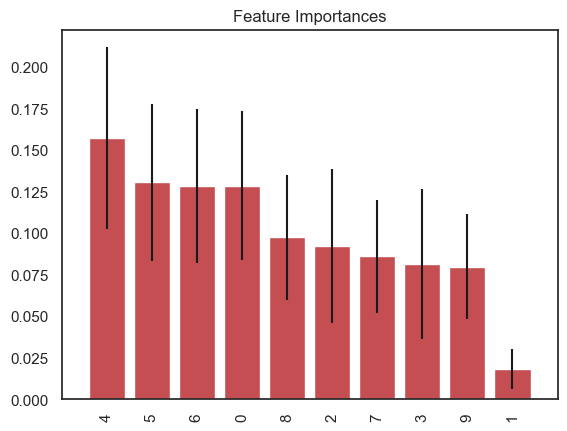

In [56]:
importances = rfc_best.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfc_best.estimators_], axis = 0)

indices = np.argsort(importances)[::-1]
plt.figure()
plt.title('Feature Importances')
plt.bar(range(features.shape[1]), importances[indices],
        color = 'r', yerr = std[indices], align = 'center')

plt.xticks(range(features.shape[1]), pd.DataFrame(features).columns[indices], rotation = 'vertical')
plt.xlim([-1, features.shape[1]])
plt.show()

<h3 style="color:black;"><b>Hyperparameter</b></h3>
<h4 style="color:black;"><b>Using GridSearchCV</b></h4>

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [59]:
param_grid = {
    'n_estimators' : [100, 100],
    'max_features' : ['sqrt', 'log2'],
    'max_depth' : [10, 50]
}

# Create GridSearchCV object with 5-fold cross validation
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5)

# Fit the GridSearchCV object to the data
CV_rfc.fit(train_features, train_labels)

# Print the best hyperparameters found
print(f"Best Hyperparameters : {CV_rfc.best_params_}")

best_model = CV_rfc.best_estimator_

train_preds = best_model.predict(train_features)
train_acc = accuracy_score(train_labels, train_preds)

test_preds = best_model.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)

print(f"Train Accuracy : {train_acc}")
print(f"Test Accuracy : {test_acc}")

Best Hyperparameters : {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}
Train Accuracy : 1.0
Test Accuracy : 0.7807017543859649


<h4 style="color:black;"><b>Using RandomSearchCV</b></h4>

In [63]:
rfc_h = RandomForestClassifier(random_state=best_random_state)

param_random ={
    'n_estimators' : [int(x) for x in np.linspace(100, 300, num = 10)],
    'max_features' : ['sqrt', 'log2', 10, 12, 15],
    'max_depth' : [int(x) for x in np.linspace(10, 50, num = 10)],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf' : [1, 2, 3],
    'criterion' : ['gini', 'entropy'],
    'bootstrap' : [True, False]

}

# Create a randomized Search Object
random_search = RandomizedSearchCV(estimator = rfc_h, param_distributions=param_random,
                                   n_iter = 50, cv = 10, verbose=True, n_jobs=-1)

# Fit the Randomized Search Object to the training Data
random_search.fit(train_features, train_labels)

# Print the Best Parameters and score
print(f"Best Parameters : {random_search.best_params_}")

# get the best estimator from Randomized search
best_rfc = random_search.best_estimator_

# Evaluate the model on Train and Test sets
train_acc = best_rfc.score(train_features, train_labels)

test_acc = best_rfc.score(test_features, test_labels)

rfc_hyperRS = best_rfc.predict(test_features)

cm_hyper = confusion_matrix(test_labels, rfc_hyperRS)

report_hyperRS = classification_report(test_labels, rfc_hyperRS, digits = 4)

print(f"Train Accuracy : {train_acc}")
print(f"Test Accuracy : {test_acc}")

print(f"\n {report_hyperRS}")

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters : {'n_estimators': 277, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 15, 'max_depth': 50, 'criterion': 'gini', 'bootstrap': True}
Train Accuracy : 0.9714912280701754
Test Accuracy : 0.7894736842105263

               precision    recall  f1-score   support

           1     0.8469    0.9022    0.8737        92
           2     0.4375    0.3182    0.3684        22

    accuracy                         0.7895       114
   macro avg     0.6422    0.6102    0.6211       114
weighted avg     0.7679    0.7895    0.7762       114



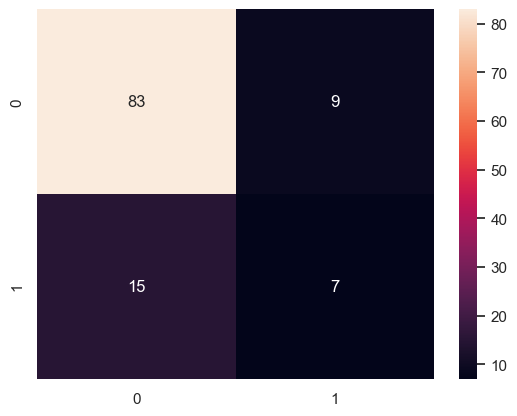

In [64]:
sns.heatmap(cm_hyper, annot = True, fmt = 'd')
plt.show()